In [11]:
import pandas as pd
import numpy as np 
import math
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.feature_selection import RFECV


Loading in the data and selecting which columns are in the model, here we will drop points and home/away and highly correlated variables



In [23]:
data = pd.read_csv(r'C:\Users\Barre\Downloads\data_w_everything.csv')

data.drop(['dateGame','Home', 'Away','PTS_H','PTS_A','avg_plus_minus_H','avg_plus_minus_A','FG_PCT_A','FG_PCT_H'],axis=1,inplace=True)
all_columns = ['Spread','Unnamed: 0', 'idGame', 'OREB_H', 'block_H', 'TO_H', 'heightH', 'weightH', 'ageH', 'OREB_A', 'block_A', 'TO_A', 'heightA', 'weightA', 'ageA', 'Total', 'OREB', 'Rivalry.Score', 'TEAM_ID_H', 'FG3_PCT_H', 'TEAM_ID_A', 'FG3_PCT_A', 'year', 'Shooting_Advantage', 'Power_Ranking_A', 'Power_Ranking_H', 'dreb_H', 'shots_missed_H', 'dreb_A', 'shots_missed_A', 'Fast_Break_A', 'Fast_Break_H']

data = data[all_columns]
data


,Spread,Unnamed: 0,idGame,OREB_H,block_H,TO_H,heightH,weightH,ageH,OREB_A,...,year,Shooting_Advantage,Power_Ranking_A,Power_Ranking_H,dreb_H,shots_missed_H,dreb_A,shots_missed_A,Fast_Break_A,Fast_Break_H
0,-7,0,22000002,8,2,19,79.000000,226.235294,28.470588,11,...,2021,0.991543,15,4,37,50,29,54,10.2,12.9
1,-4,1,22100341,13,3,12,76.941176,213.176471,29.176471,6,...,2022,0.988142,13,23,30,53,28,43,11.8,15.3
2,-3,2,22100904,13,7,12,76.941176,213.176471,29.176471,7,...,2022,0.848178,13,23,34,59,40,48,11.8,15.3
3,-6,3,22200016,8,5,10,78.312500,208.562500,25.687500,10,...,2023,0.758099,10,17,30,65,48,54,13.0,16.2
4,-18,4,22200719,9,4,7,78.312500,208.562500,25.687500,7,...,2023,0.728171,10,17,23,62,40,36,13.0,16.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,18,3449,22000756,13,4,20,78.176471,218.235294,28.294118,7,...,2021,1.192500,4,15,37,46,29,53,13.5,10.3
3450,24,3450,22001002,9,5,22,78.176471,218.235294,28.294118,11,...,2021,1.403694,4,15,39,39,23,65,13.5,10.3
3451,1,3451,22100786,7,6,10,78.352941,212.235294,27.294118,11,...,2022,1.109442,23,13,36,48,33,55,14.4,11.7
3452,21,3452,22100945,13,3,12,78.352941,212.235294,27.294118,9,...,2022,1.122951,23,13,33,44,27,48,14.4,11.7


In [24]:
plt.figure(figsize=(12,10))
cor = data.corr()
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)


<Figure size 864x720 with 0 Axes>

In [25]:
cor_target = abs(cor["Spread"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features


Spread                1.000000
Shooting_Advantage    0.781368
Name: Spread, dtype: float64

Here we use a scaler to regularize and isolate the spread variable as our explanatory

In [26]:
X = data.iloc[:, 1:]  
y = data['Spread']    

scaler = StandardScaler()



Here we do the test and training splits

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = .3,random_state=1)

scaler.fit(x_train)
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

creating our lasso regression

In [28]:
reg = LassoCV()



reg.fit(X_train_scaled,y_train)
y_pred = reg.predict(X_test_scaled)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
coef

Best alpha using built-in LassoCV: 0.026526
Best score using built-in LassoCV: -872605333862032.625000
Lasso picked 27 variables and eliminated the other 4 variables


Unnamed: 0            0.104295
idGame                0.075904
OREB_H                2.874598
block_H               0.000000
TO_H                 -5.239056
heightH               0.000000
weightH               0.162094
ageH                  0.471477
OREB_A               -2.835832
block_A              -0.278804
TO_A                  5.303803
heightA              -0.000000
weightA              -0.198443
ageA                 -0.341504
Total                 0.006477
OREB                  0.000000
Rivalry.Score         0.002175
TEAM_ID_H            -0.124025
FG3_PCT_H             3.147735
TEAM_ID_A            -0.146504
FG3_PCT_A            -2.971699
year                  0.005382
Shooting_Advantage    5.689273
Power_Ranking_A       0.257853
Power_Ranking_H      -0.108279
dreb_H                3.431846
shots_missed_H       -2.144190
dreb_A               -3.386276
shots_missed_A        1.947425
Fast_Break_A          0.207483
Fast_Break_H          0.134621
dtype: float64

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8903988814293256

In [30]:
reg.fit(X,y)
reg.score(X,y)

0.01705523207269022

In [31]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 23.57709122229315


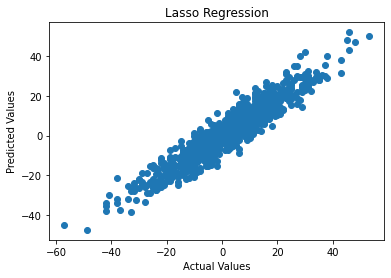

In [32]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression')
plt.show()

In [36]:
ridge=Ridge(alpha=1)

In [37]:
ridge.fit(x_train, y_train)

# make predictions on the testing data
y_pred = ridge.predict(x_test)

# evaluate the model using the mean squared error metric
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))

Mean Squared Error: 23.86


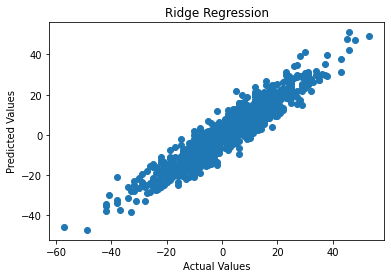

0.8891040381041118

In [38]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression')
plt.show()
r2_score(y_test,y_pred)

In [ ]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
cor_target = abs(cor["Spread"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features


In [ ]:
data.columns